In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

First, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

Shapefiles are another type of geospatial data file that you can use to create a GeoDataFrame.

In [10]:
counties = gpd.read_file('../data/county/tncounty.shp')
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [3]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [11]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


Remember, if we call `.plot()` and a GeoDataFrame, it will render a plot using the geometry column.

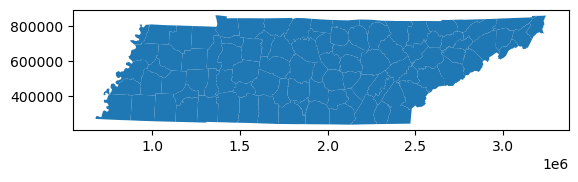

In [4]:
counties.plot();

If we want a larger plot, we can use `plt.subplots()` and set a figsize. When we create our plot, we need to specify that we want it to render on the axes we just created.

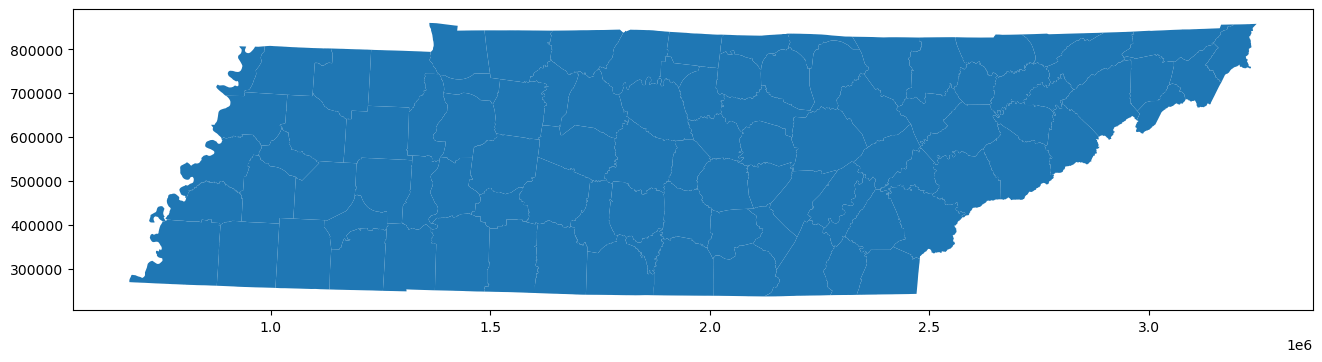

In [5]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

Since the axes are not conveying useful information, we can remove them.

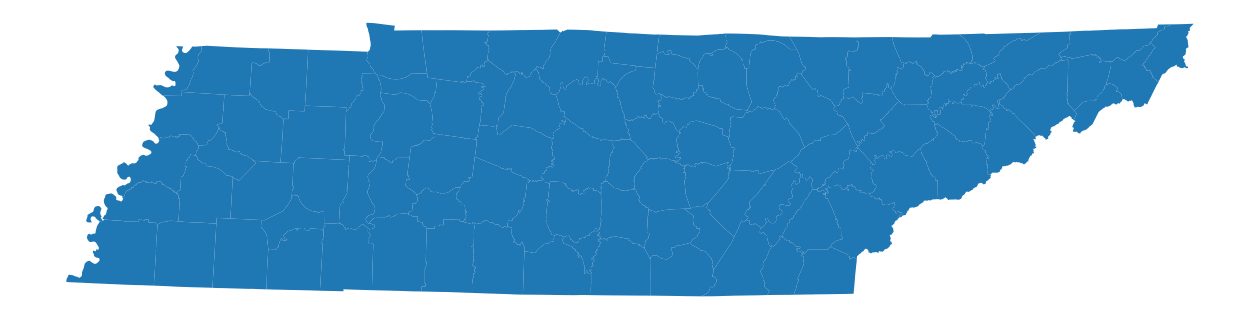

In [6]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [46]:
df1 = pd.read_csv('../data/levi.csv')

df1['Zip Code']=df1['Zip Code'].astype(str)
df1

,Unnamed: 0,Zip Code,Opioid Claim Count
0,0,37203,83587
1,1,37013,40306
2,2,37232,31713
3,3,37076,26684
4,4,37205,24507
5,5,37027,18707
6,6,37207,17967
7,7,37211,10761
8,8,37122,7409
9,9,37204,6213


Now, we can merge the two together. If we put the GeoDataFrame on the left, the result will be a GeoDataFrame.

In [18]:
zip_opioid= pd.merge(left =zipcodes , right = df1, left_on = 'zip', right_on = 'Zip Code')
zip_opioid

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,Unnamed: 0,Zip Code,Opioid Claim Count
0,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",9,37204,6213
1,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",5,37027,18707
2,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",5,37027,18707
3,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",5,37027,18707
4,37027,29,BRENTWOOD,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",5,37027,18707
5,37207,49,NASHVILLE,14456.130686344946,6987521.0933837891,"MULTIPOLYGON (((-86.78596 36.29097, -86.78595 ...",6,37207,17967
6,37027,28,BRENTWOOD,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",5,37027,18707
7,37027,27,BRENTWOOD,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",5,37027,18707
8,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ...",3,37076,26684
9,37027,44,BRENTWOOD,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",5,37027,18707


In [60]:
df3=zip_opioid.groupby('zip').agg({'Opioid Claim Count':'sum','po_name':'first'})
df3.reset_index()                 

,zip,Opioid Claim Count,po_name
0,37013,40306,ANTIOCH
1,37027,168363,BRENTWOOD
2,37076,53368,HERMITAGE
3,37122,14818,MOUNT JULIET
4,37203,83587,NASHVILLE
5,37204,6213,NASHVILLE
6,37205,24507,NASHVILLE
7,37207,35934,NASHVILLE
8,37211,10761,NASHVILLE
9,37232,31713,NASHVILLE


In [70]:
df3=df3.sort_values(by='Opioid Claim Count',ascending=False).reset_index()
df3.rename(columns={'po_name':'city'}).reset_index()


ValueError: cannot insert level_0, already exists

In [78]:
df4=df3[df3['po_name']!='BRENTWOOD']



In [79]:
df4.rename(columns={'po_name':'city'})

,level_0,index,zip,Opioid Claim Count,city
1,1,1,37203,83587,NASHVILLE
2,2,2,37076,53368,HERMITAGE
3,3,3,37013,40306,ANTIOCH
4,4,4,37207,35934,NASHVILLE
5,5,5,37232,31713,NASHVILLE
6,6,6,37205,24507,NASHVILLE
7,7,7,37122,14818,MOUNT JULIET
8,8,8,37211,10761,NASHVILLE
9,9,9,37204,6213,NASHVILLE


In [76]:
df3

,level_0,index,zip,Opioid Claim Count,po_name
0,0,0,37027,168363,BRENTWOOD
1,1,1,37203,83587,NASHVILLE
2,2,2,37076,53368,HERMITAGE
3,3,3,37013,40306,ANTIOCH
4,4,4,37207,35934,NASHVILLE
5,5,5,37232,31713,NASHVILLE
6,6,6,37205,24507,NASHVILLE
7,7,7,37122,14818,MOUNT JULIET
8,8,8,37211,10761,NASHVILLE
9,9,9,37204,6213,NASHVILLE


To color our map based on a column, we can use the `column` argument.

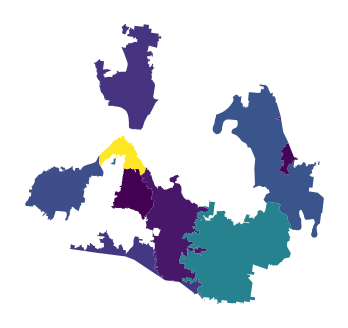

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
zip_opioid.plot(column = 'Opioid Claim Count', 
              ax = ax)
ax.axis('off');

The default colormap is not great. We can change it by specifying the `cmap` argument. A list of named colormaps is available at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.  

With a choropleth which shows an amount for each region relative to the other regions, you want a **sequential** colormap.

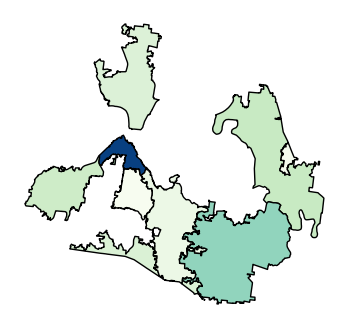

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
zip_opioid.plot(column = 'Opioid Claim Count', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              ax = ax)
ax.axis('off');

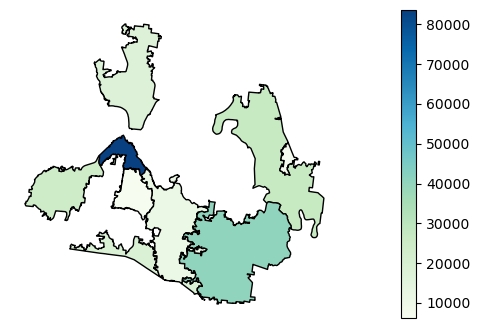

In [22]:
fig, ax = plt.subplots(figsize=(16,4))
zip_opioid.plot(column = 'Opioid Claim Count',
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

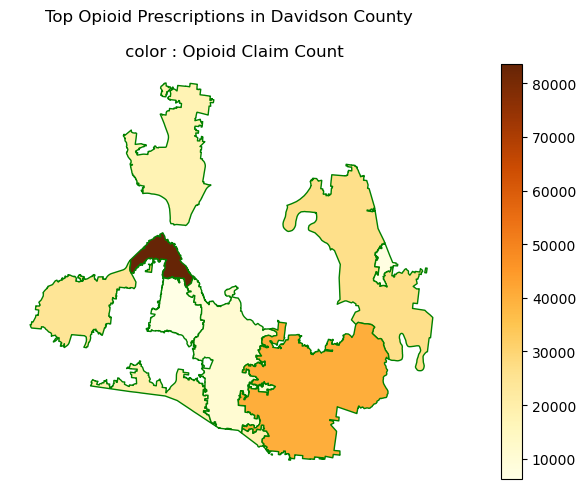

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
zip_opioid.plot(column = 'Opioid Claim Count', 
              cmap = 'YlOrBr', 
              edgecolor = 'green', 
              legend = True,
              ax = ax)
plt.title('Top Opioid Prescriptions in Davidson County \n   \n color : Opioid Claim Count', fontsize = 12)
ax.axis('off');
plt.tight_layout()

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

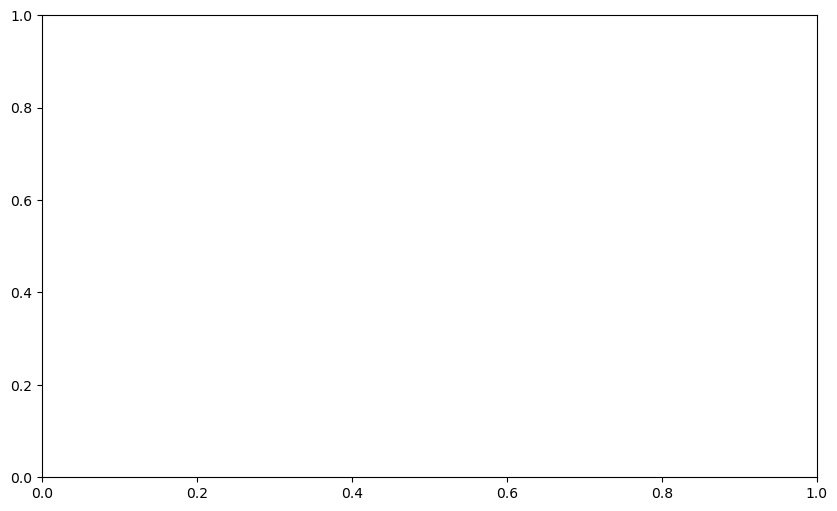

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
df3.plot(column = 'Opioid Claim Count', 
              cmap = 'YlOrBr', 
              edgecolor = 'green', 
              legend = True,
              ax = ax)
plt.title('Unemployment Rate Vs overdose_deaths by County \n   \n color : unemployment , label : overdose_deaths', fontsize = 14)
for x, y, label1,label2 in zip(df3.geometry.centroid.x, 
                       df3.geometry.centroid.y, 
                       df3['Opioid Claim Count'], zip_opioid['po_name'].str.lower()):
    label = f" {label2:}\n{label1}"
    ax.annotate(str(label),xy=(x, y),horizontalalignment='center',fontsize=8,color='black',)
    ax.axis('off');
    plt.tight_layout()